In [497]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from statsmodels.formula.api import ols
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats





In [460]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
data = pd.read_csv("myAnimelist-No_Hentai.csv", usecols=['name','type','source','episodes','duration','rating', 'score', 'scored_by','rank','popularity','members', 'favorites']) 
data_number_set = pd.read_csv("myAnimelist-No_Hentai.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites']) 

# dropping all null values
data.dropna(inplace = True) 

 

In [461]:
data

,name,duration,episodes,type,source,rating,score,scored_by,rank,popularity,members,favorites
0,Super Child,1:41,1,Movie,Unknown,PG-13 - Teens 13 or older,2.82,381,10281,9292,789,2
1,Gold Pencil And Alien Boy,1:05,1,Movie,Unknown,None,3.04,49,11023,12627,170,0
2,Takoyaki Story,0:01,1,Music,Original,R+ - Mild Nudity,3.28,25,13254,15083,46,0
3,Geisters Movie: Hikari no Shou,1:40,1,Movie,Original,PG-13 - Teens 13 or older,3.36,11,11006,14053,101,0
4,Xiong Chumo Zhi: Guonian,1:08,1,Special,Original,PG - Children,3.41,17,13641,14790,62,0
5,Uju Heukgisa,1:10,1,Movie,Unknown,PG - Children,3.42,240,10265,10204,497,3
6,Dead Girl Trailer,0:01,1,ONA,Original,R - 17+ (violence & profanity),3.43,974,10264,8008,1477,0
7,C.L.A.Y.,0:01,1,ONA,Original,R - 17+ (violence & profanity),3.48,1276,10258,7507,1881,0
8,No Littering,0:01,1,ONA,Original,R - 17+ (violence & profanity),3.52,2186,10254,6419,3047,1
9,Dead World,0:01,1,ONA,Original,R - 17+ (violence & profanity),3.57,469,10273,8657,1109,0


### Stat functions

In [ ]:
def calc_slope(xs, ys):

    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def best_fit(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):

    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def plot_reg(X, Y, Y_pred):
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.legend(loc=4)
    plt.show()
    return None

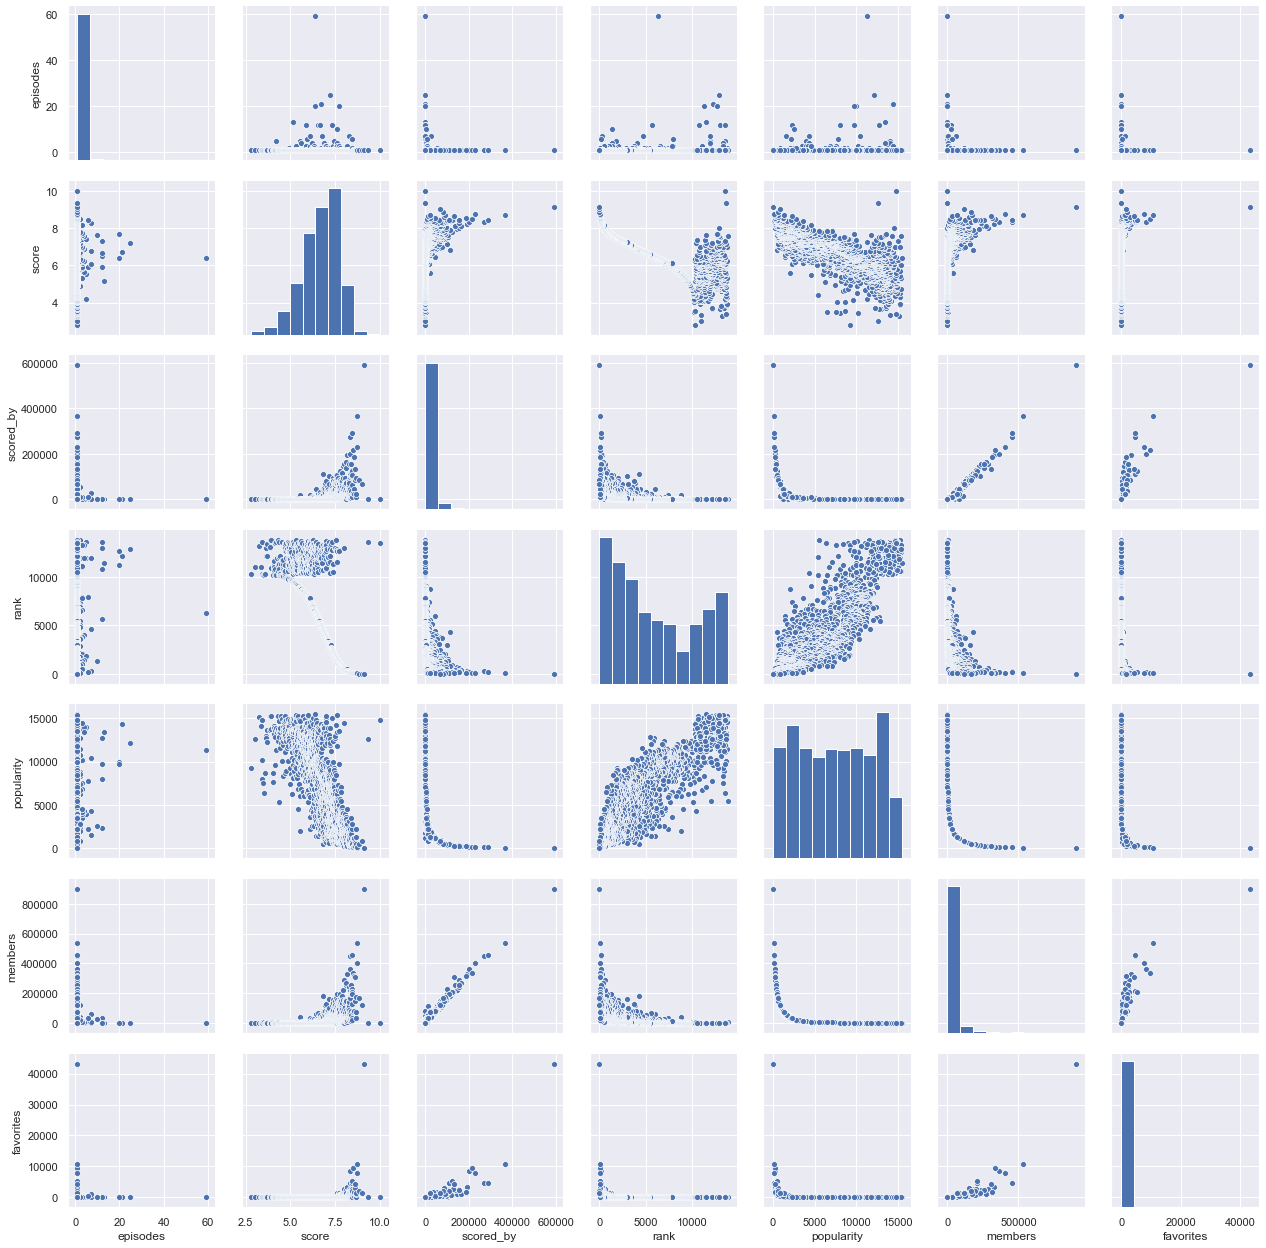

In [498]:
sns.pairplot(data)

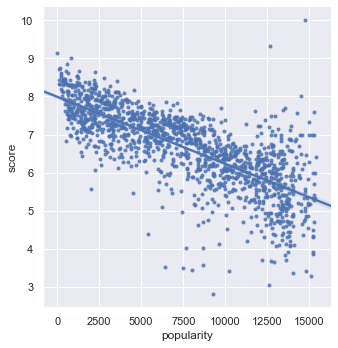

In [288]:

sns.lmplot(x='popularity', y='score', data= data, markers=[ "."], fit_reg =True)
# sns.set(rc={'figure.figsize':(100,100)})

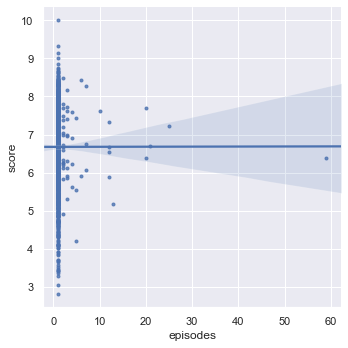

In [289]:
sns.lmplot(x='episodes', y='score', data= data, markers=[ "."], fit_reg =True)

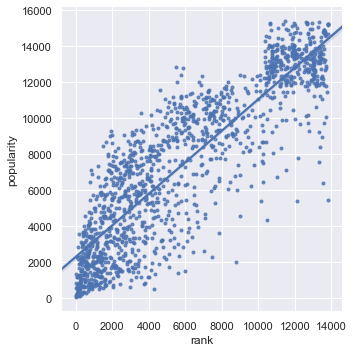

In [315]:
sns.lmplot(x='rank', y='popularity', data= data, markers=[ "."], fit_reg =True)

### Checking the relationships between the different categories

AttributeError: 'str' object has no attribute 'conjugate'

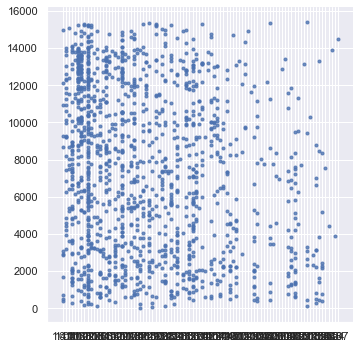

In [318]:
sns.lmplot(x='duration', y='popularity', data= data, markers=[ "."], fit_reg =True)

In [292]:
data.columns

Index(['name', 'duration', 'episodes', 'type', 'source', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites'],
      dtype='object')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

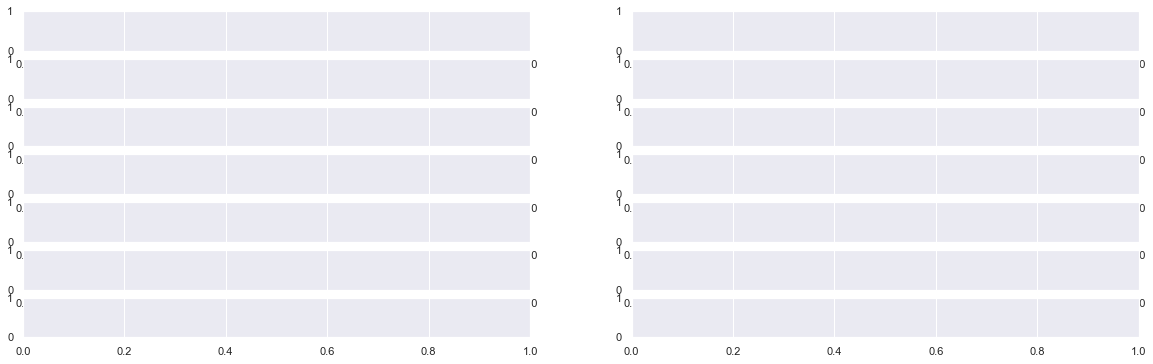

In [293]:
rows = 7
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,6))
col = data.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[i]], ax = ax[i][j])
        index = i + 1
plt.tight_layout()

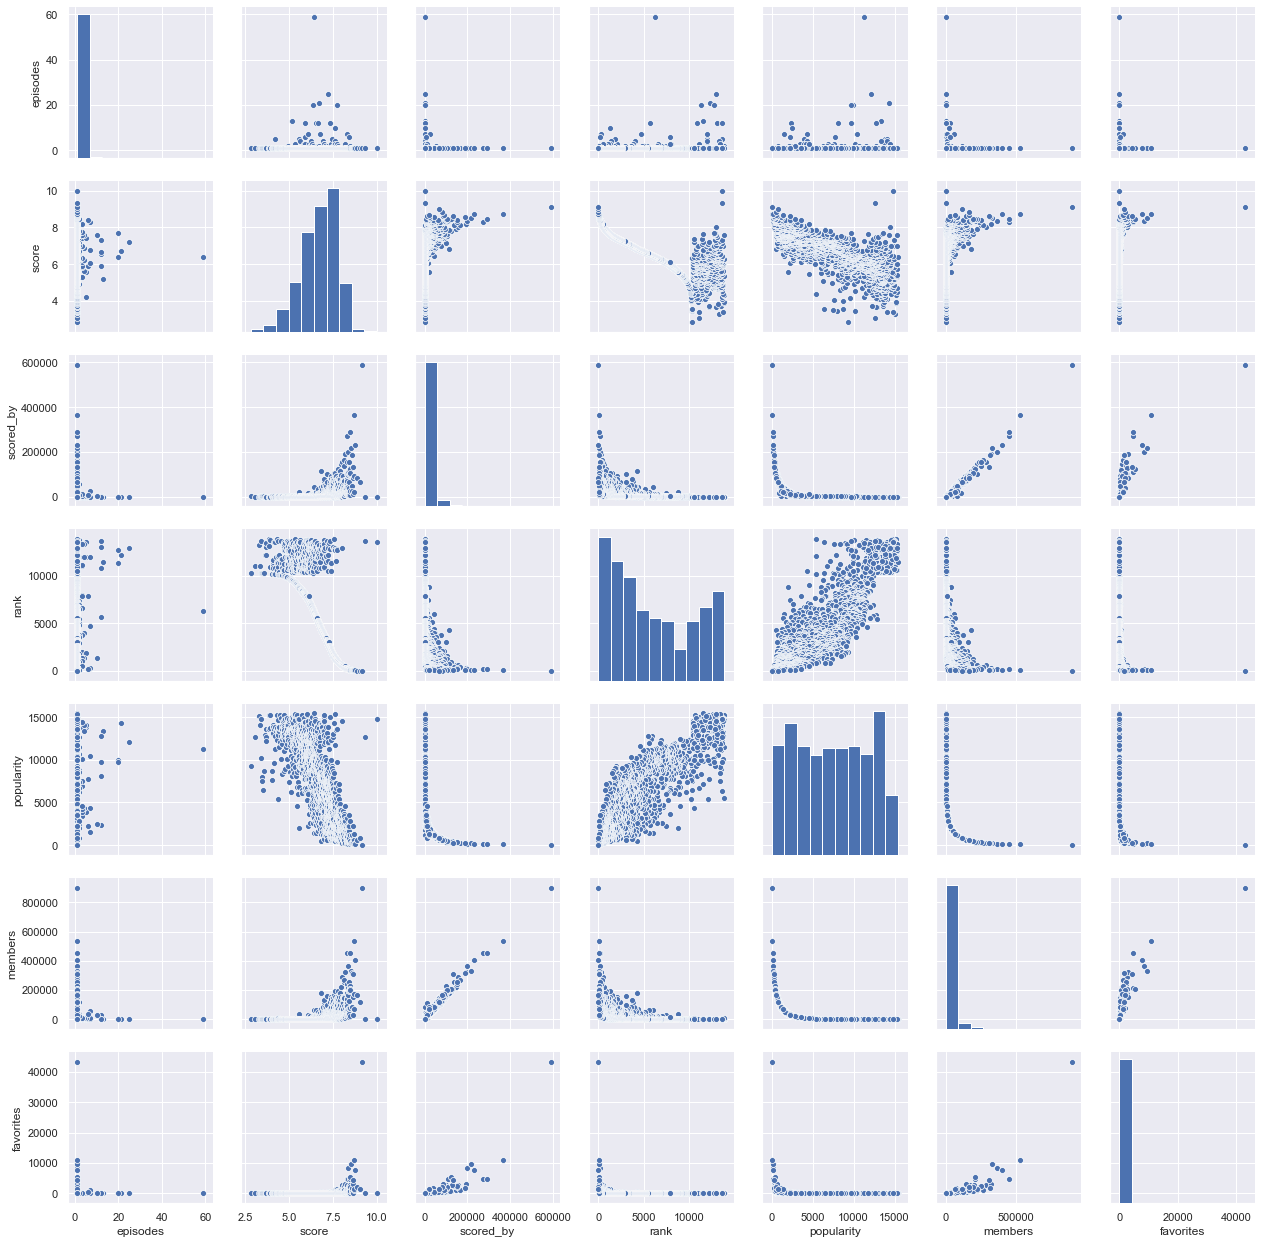

In [294]:
sns.pairplot(data_number_set)

IndexError: index 7 is out of bounds for axis 0 with size 7

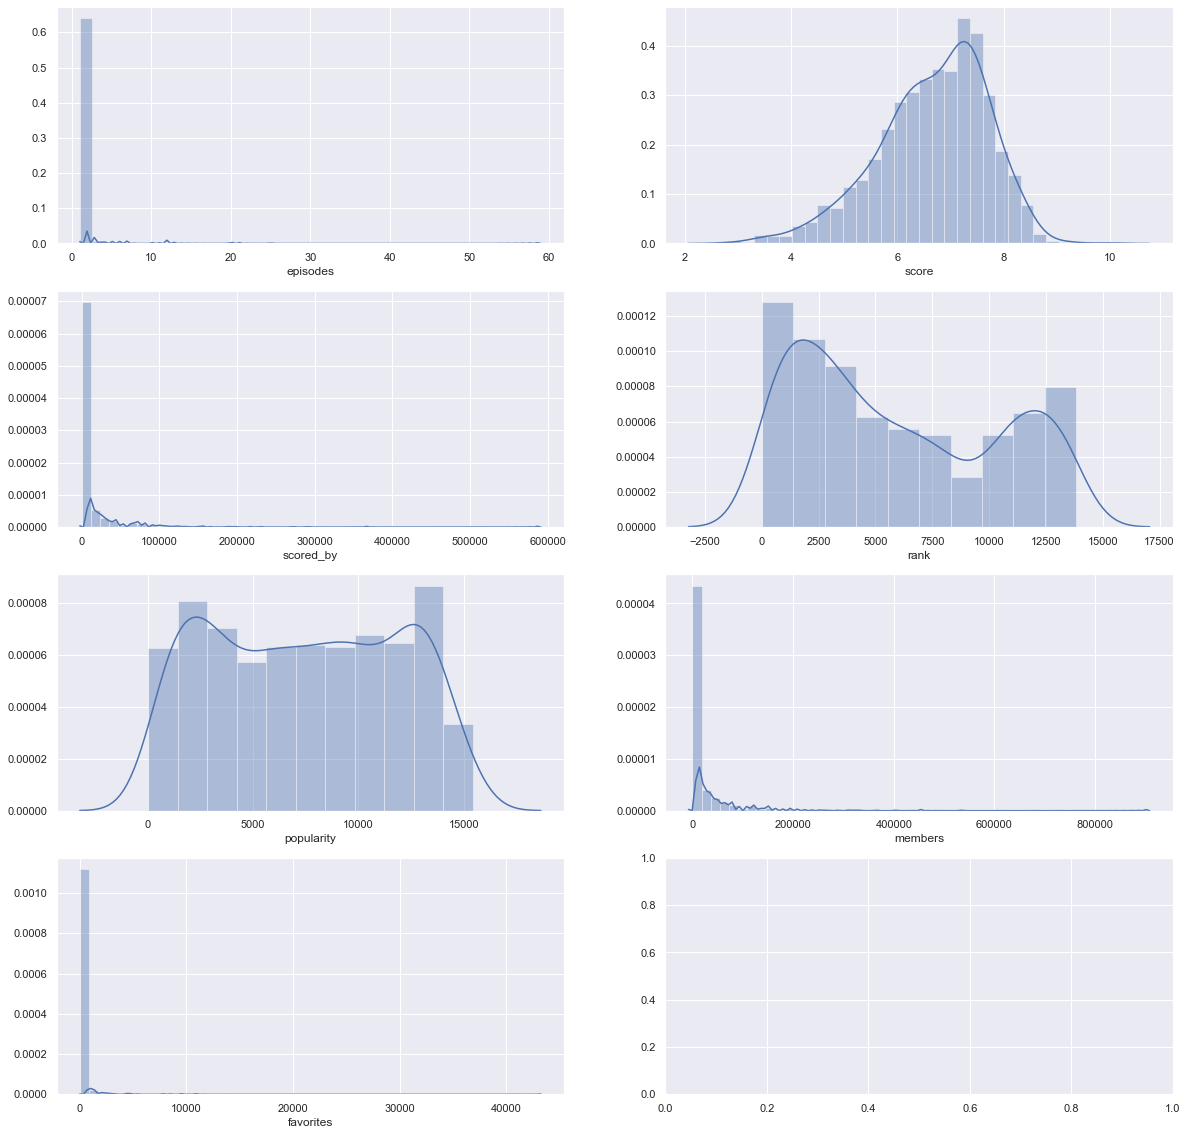

In [506]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,20))
col = data_number_set.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_number_set[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

# Rank as it relates to Popularity

In [507]:
rank=data.iloc[:,8]
popularity=data.iloc[:,9]
x1 = rank.values.reshape(-1,1)
y1 = popularity.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x1,y1)
y_pred = lr.predict(x1)

In [406]:
data['rank'].max()

13837

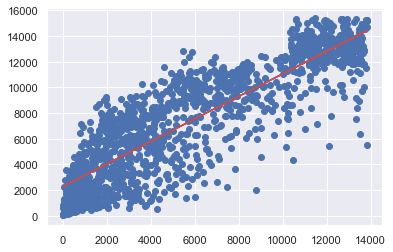

In [420]:
plt.scatter(x1,y1)
plt.plot(x1,y_pred, color = 'r')
# plt.xlim(15000,-10)
# plt.ylim(16000,-10)
plt.show()

In [324]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.25)

In [495]:
len(x1_train) ,len(x1_test)

(1092, 365)

In [496]:
lr.fit(x1_train,y1_train)
lr.predict(x1_test)

array([[ 3657.52857445],
       [10006.7062028 ],
       [ 6965.45187322],
       [ 5783.86272354],
       [12638.30787247],
       [ 7928.61808432],
       [13552.3508524 ],
       [ 9771.61645364],
       [ 2843.48645797],
       [ 3265.41992567],
       [ 8253.18229025],
       [ 8561.0796856 ],
       [12323.39287267],
       [ 7791.7747975 ],
       [12162.86517082],
       [11702.33487862],
       [ 8447.9208138 ],
       [ 5230.34917236],
       [ 8674.23855739],
       [ 3334.71876964],
       [13629.54450138],
       [13430.41997504],
       [11746.19490645],
       [ 8174.23424016],
       [ 2811.90723793],
       [ 4178.58570505],
       [ 3523.3168893 ],
       [ 6840.01219364],
       [ 8613.71171899],
       [ 7653.17710956],
       [ 8518.97405888],
       [ 4123.32206998],
       [ 3832.09148521],
       [ 8148.79542402],
       [ 6542.64120496],
       [ 3268.05152734],
       [ 4739.99406124],
       [ 5304.91121966],
       [ 6239.12981239],
       [12094.4435274 ],


## Evaluating Accuracy

In [332]:
accuracy = lr.score(x1_test,y1_test)
accuracy

0.762812231771264

In [398]:
data.describe()

,episodes,score,scored_by,rank,popularity,members,favorites
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,1.203844,6.676561,10437.638984,5926.275909,7470.475635,19908.463967,152.131091
std,2.032439,1.029966,31648.358812,4362.394256,4371.952930,52695.618225,1289.356313
min,1.000000,2.820000,1.000000,2.000000,20.000000,10.000000,0.000000
25%,1.000000,6.050000,45.000000,2048.000000,3387.000000,271.000000,0.000000
50%,1.000000,6.820000,578.000000,4893.000000,7471.000000,1900.000000,2.000000
75%,1.000000,7.420000,5025.000000,10430.000000,11432.000000,14666.000000,27.000000
max,59.000000,10.000000,588675.000000,13837.000000,15420.000000,900593.000000,43260.000000


In [396]:
data['type'].values

array(['Movie', 'Movie', 'Music', ..., 'Movie', 'ONA', 'Movie'],
      dtype=object)

# Rank in relation to total number of scores

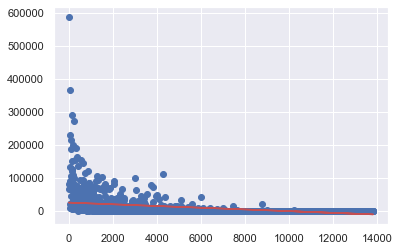

In [508]:
score_by=data.iloc[:,7]

x2 = rank.values.reshape(-1,1)
y2 = score_by.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x2,y2)
y_pred2 = lr.predict(x2)

plt.scatter(x2,y2)
plt.plot(x2,y_pred2, color = 'r')
# plt.xlim(15000,-10)
# plt.ylim(0,370000)
plt.show()

In [488]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.25)
lr.fit(x2_train,y2_train)
lr.predict(x2_test)
accuracy = lr.score(x2_test,y2_test)
accuracy

0.1813294443618656

# Rank to total # of members 

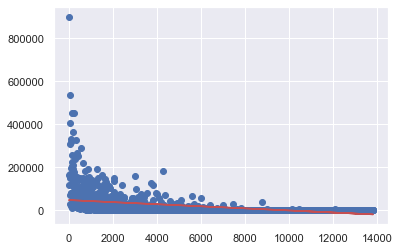

In [509]:
number_of_members = data.iloc[:,10]

x3 = rank.values.reshape(-1,1)
y3 = number_of_members.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x3,y3)
y_pred3 = lr.predict(x3)

plt.scatter(x3,y3)
plt.plot(x3,y_pred3, color = 'r')
# plt.xlim(15000,-10)
# plt.ylim(0,370000)
plt.show()

In [494]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.25)
lr.fit(x3_train,y3_train)
lr.predict(x3_test)
accuracy = lr.score(x3_test,y3_test)
accuracy

0.11640973398230749

# Rank to Score

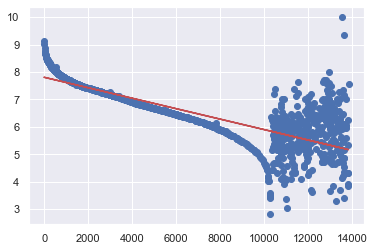

In [501]:
score=data.iloc[:,6]

x4 = rank.values.reshape(-1,1)
y4 = score.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x4,y4)
y_pred4 = lr.predict(x4)

plt.scatter(x4,y4)
plt.plot(x4,y_pred4, color = 'r')
# plt.xlim(15000,-10)
# plt.ylim(0,370000)
plt.show()

In [504]:
data.iloc[:,6]

0        2.82
1        3.04
2        3.28
3        3.36
4        3.41
5        3.42
6        3.43
7        3.48
8        3.52
9        3.57
10       3.64
11       3.67
12       3.70
13       3.71
14       3.84
15       3.85
16       3.91
17       3.92
18       4.01
19       4.02
20       4.07
21       4.08
22       4.09
23       4.10
24       4.10
25       4.12
26       4.13
27       4.17
28       4.19
29       4.20
        ...  
1427     8.39
1428     8.39
1429     8.41
1430     8.41
1431     8.42
1432     8.43
1433     8.43
1434     8.44
1435     8.44
1436     8.46
1437     8.46
1438     8.46
1439     8.48
1440     8.49
1441     8.50
1442     8.55
1443     8.55
1444     8.56
1445     8.61
1446     8.63
1447     8.65
1448     8.68
1449     8.68
1450     8.72
1451     8.75
1452     8.86
1453     9.02
1454     9.14
1455     9.33
1456    10.00
Name: score, Length: 1457, dtype: float64

In [502]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.25)
lr.fit(x4_train,y4_train)
lr.predict(x4_test)
accuracy = lr.score(x4_test,y4_test)
accuracy

0.6648516944183891

In [451]:
# get_Zscores(data['rank'])

[0.9982417531643338,
 1.1683318358970776,
 1.6797482436824565,
 1.1644348933007747,
 1.7684609957277013,
 0.9945740424854607,
 0.994344810568031,
 0.9929694190634536,
 0.9920524913937353,
 0.9964078978248972,
 1.4376793388768265,
 1.616480234471894,
 1.4232377280787634,
 1.7221561484069274,
 1.6526988774257667,
 1.8078888855255881,
 1.1403655419706695,
 1.8060550301861515,
 0.9796739678525384,
 0.9794447359351088,
 1.1662687486402112,
 1.2173874662270063,
 1.1646641252182044,
 1.319624901400596,
 1.1114823203745432,
 1.749434746581047,
 0.9782985763479609,
 1.12936240993405,
 0.9757770252562356,
 1.7583747913608,
 1.3888529404643275,
 1.2542938049331676,
 1.8076596536081586,
 1.0713667348243678,
 1.2295367578507737,
 1.8081181174430176,
 1.406274566188975,
 1.7689194595625606,
 1.2506260942542944,
 1.1339470482826415,
 0.9709631549902146,
 1.0257495832558827,
 1.0172680023109884,
 0.9622523421278908,
 1.4379085707942563,
 0.9606477187058837,
 1.2430614409791185,
 0.9533122973481374,
 1

In [471]:
# run_ttest(data['score'], 0.05,two_tail=True)


Null hypothesis not rejected. Results are not statistically significant with t-value: -0.0 < critical t-value: 1.962 and p-value: 0.9999999999998688 > alpha: 0.05



In [457]:
# score_mu = data['score'].mean()
# score_mu

6.676561427590944

In [465]:
# def get_Zscores(df):
#     mu = df.mean()
#     sigma = df.std()
#     z_scores = [(df.iloc[i]-mu)/sigma for i in range(df.shape[0])]
#     return z_scores
# # Runs a one-sample t-test on data. Population_mean = mu and alpha = a.
# # Pass a bool through 'two_tail' to run a two_tail or one_tail test (True = 2 tail, False = 1 tail)
# def run_ttest(data, alpha, two_tail):
    
#     #calculate parameters
#     n = len(data)
#     s = np.std(data)
#     x_bar = np.mean(data)
#     std_err = s/np.sqrt(n)
#     mu = data.mean()

#     #Where function becomes conditional based on two-tail test or one-tail test
#     if two_tail:
#         #calculate the t-value and p-value
#         t_crit = stats.t.ppf(1-alpha/2, df=n-1)
#         t_p_values = stats.ttest_1samp(a=data, popmean=mu)
#         t = t_p_values[0]
#         p = t_p_values[1]

#         #print results of test
#         if (t>t_crit) and (p<alpha):
#             print(f'Null hypothesis rejected. Results are statistically significant since t-value: {round(t,3)} > critical t-value: {round(t_crit,3)} and p-value: {p} < alpha: {alpha}\n')
#         else:
#             print(f'Null hypothesis not rejected. Results are not statistically significant with t-value: {round(t,3)} < critical t-value: {round(t_crit,3)} and p-value: {p} > alpha: {alpha}\n')

#     else:
#         #calculate the t-value and p-value
#         t_crit = stats.t.ppf(1-alpha, df=n-1)
#         t_p_values = stats.ttest_1samp(a=data, popmean=mu)
#         t = t_p_values[0]
#         p = t_p_values[1]

#         #print results of test
#         if (t>t_crit) and (p<alpha):
#             print(f'Null hypothesis rejected. Results are statistically significant since t-value: {round(t,3)} > critical t-value: {round(t_crit,3)} and p-value: {p} < alpha: {alpha}\n')
#         else:
#             print(f'Null hypothesis not rejected. Results are not statistically significant with t-value: {round(t,3)} < critical t-value: {round(t_crit,3)} and p-value: {p} > alpha: {alpha}\n')

# # Calculates Cohen's D. Suggestion: only pass lists in as data1 and data2
# def Cohen_d(data1, data2):
    
#     #calculate parameters
#     xbar_1, xbar_2 = np.mean(data1), np.mean(data2)
#     var_1, var_2 = np.var(data1), np.var(data2)
#     n1, n2 = len(data1), len(data2)
#     var_p = ((n1-1)*var_1 + (n2-1)*var_2) / (n1+n2-2)
    
#     #calculate Cohen's D
#     d = (xbar_1 - xbar_2) / np.sqrt(var_p)
#     return d


